## 1. Introduction

### Author : Richa Dubey 

#### New York City Taxi Cab 

Taxicabs are the only vehicles that have the right to pick up street-hailing and prearranged passengers anywhere in New York City. By law, there are 13,587 taxis in New York City and each taxi must have a medallion affixed to it.

#### Problem Definition - 
To build a predictive model for the target variable Extra.

#### Objective -
The main objective of this project is to clean and analyse the data available with purpose of using it in machine learning algorithms to generate a predictive model for the given target variable 'Extra' from the dataset for predicting if miscellaneous extra charges and surcharges were levied. The 'Extra' variable is Column with boolean values 'True'  when extra charges above the taxi fare were applied, 'False' otherwise.

We will try to come up with a ML model that can makes these predictions as easily as possible, by generating an output that is as close as possible to the actual fare turns out to be. 

Using this we will try to predict if extra charges will be leveied, before the actual trip.


## 2. Data Background-

#### Dataset Used :
The data in the file is about features of taxi trips in New York City. The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). 

The given data is for the month of Feb 2016, for yellow taxicabs in New york city.

According to the NYC government taxi fares website, a taxi fare is calculated as an initial 2.50 USD pickup fee, 50 cents per mile when moving above 12mph, and 50 cents per minute when travelling below 12mph, plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties, a 30 cent improvement surcharge, 50 cents for overnight (8pm to 6am) and a 1.00 USD charge for rushhour, between 4pm and 8pm on weekdays.[1] 

#### Target Variable: Extra 

The dataset has been slightly modified and a new boolean feature -'Extra' has been added which indicates if additional charges were included during the trip. 

The objective to predict if extra charges will be included before the actual trip.

#### Dataset Features Description
| Field Name | Description | 
| --- | --- | 
| VendorID | A code indicating the TPEP provider that provided the record. a.Creative Mobile Technologies b. VeriFone Inc. | 
| tpep_pickup_datetime | 	The date and time when the meter was engaged. | 
| tpep_dropoff_datetime | The date and time when the meter was disengaged. | 
| Passenger_count | The number of passengers in the vehicle. This is a driver-entered value. | 
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. | 
| Pickup_longitude | Longitude where the meter was engaged. | 
| Pickup_latitude | Latitude where the meter was engaged. | 
| RateCodeID | The final rate code in effect at the end of the trip. | 
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. | 
| Dropoff_longitude | Longitude where the meter was disengaged. | 
| Dropoff_ latitude	 | Latitude where the meter was disengaged. | 
| Payment_type | A numeric code signifying how the passenger paid for the trip.| 
| Fare_amount | The time-and-distance fare calculated by the meter. | 
| Extra | Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges. | 
| MTA_tax	 | 0.50 MTA tax that is automatically triggered based on the metered rate in use. | 
| Improvement_surcharge | 0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015. | 
| Tip_amount | Tip amount – This field is automatically populated for credit card tips.Cash tips are not included. | 
| Tolls_amount | Total amount of all tolls paid in trip. |
| Total_amount | The total amount charged to passengers. Does not include cash tips. | 
| GoodTip | Categorical variable indicating an above average tip. | 
| Extra | An indicator for additional charges included. | 
| Cash | An indicator whether payment was made by cash or not | 


#### Importing required libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (16,8)

In [4]:
df = pd.read_csv('taxi_data.csv') #Reading the csv file

In [5]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,-73.971863,40.794510,1,N,...,52.0,0.5,0.5,0.00,0.00,0.3,53.30,False,True,False
1,2,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,-73.977814,40.757915,1,N,...,10.0,0.5,0.5,2.25,0.00,0.3,13.55,True,True,False
2,3,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,-73.971878,40.754070,1,N,...,27.5,0.5,0.5,4.50,0.00,0.3,33.30,True,True,False
3,4,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,-73.998825,40.745388,1,N,...,6.0,0.5,0.5,1.45,0.00,0.3,8.75,False,True,False
4,5,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,-73.987579,40.744087,1,N,...,6.5,0.5,0.5,1.55,0.00,0.3,9.35,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,28450,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,-73.866081,40.771370,1,N,...,34.0,0.5,0.5,10.21,5.54,0.3,51.05,True,True,False
28450,28451,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,-73.913750,40.675571,1,N,...,12.0,0.5,0.5,2.66,0.00,0.3,15.96,True,True,False
28451,28452,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,-73.781700,40.644772,2,N,...,52.0,0.0,0.5,3.00,5.54,0.3,61.34,True,False,False
28452,28453,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,-73.873207,40.774120,1,N,...,22.5,0.5,0.5,2.50,5.54,0.3,31.84,True,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

## 3. Data Preprocessing
In this section we will be performing basic preprocessing to clean the data by removing attributes that are not important to us, also we will be removing outlier/illegitimate values, missing values and other noise which might effect the results of the algorithm.

We will first remove the Unname:0 column as it is of no use to us.

In [7]:
#remove Unnamed: 0
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'GoodTip', 'Extra', 'Cash'],
      dtype='object')

#### Pickup and Dropoff Latitude & Longitutde
We found that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004), so any cordinates that lie outside of these cordinates will not be considered by us as we are only concerned with pickups and dropoffs which are within New York, and the remainig coordinates become outliers for us. Hence we will be removing these outliers from our dataset.

In [8]:
#New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004)
#removing lat, lon outside these bounds

df = df.loc[(df['pickup_longitude'] < -73.7) & (df['pickup_longitude'] > -74.15) 
            & (df['pickup_latitude'] > 40.5774) & (df['pickup_latitude'] < 40.9176)
            & (df['dropoff_longitude'] < -73.7) & (df['dropoff_longitude'] > -74.15) 
            & (df['dropoff_latitude'] > 40.5774) & (df['dropoff_latitude'] < 40.9176)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,-73.971863,40.794510,1,N,-73.866974,...,52.0,0.5,0.5,0.00,0.00,0.3,53.30,False,True,False
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,-73.977814,40.757915,1,N,-73.993805,...,10.0,0.5,0.5,2.25,0.00,0.3,13.55,True,True,False
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,-73.971878,40.754070,1,N,-73.940109,...,27.5,0.5,0.5,4.50,0.00,0.3,33.30,True,True,False
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,-73.998825,40.745388,1,N,-73.987793,...,6.0,0.5,0.5,1.45,0.00,0.3,8.75,False,True,False
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,-73.987579,40.744087,1,N,-73.996269,...,6.5,0.5,0.5,1.55,0.00,0.3,9.35,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,-73.866081,40.771370,1,N,-73.975731,...,34.0,0.5,0.5,10.21,5.54,0.3,51.05,True,True,False
28450,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,-73.913750,40.675571,1,N,-73.936150,...,12.0,0.5,0.5,2.66,0.00,0.3,15.96,True,True,False
28451,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,-73.781700,40.644772,2,N,-73.973671,...,52.0,0.0,0.5,3.00,5.54,0.3,61.34,True,False,False
28452,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,-73.873207,40.774120,1,N,-73.950615,...,22.5,0.5,0.5,2.50,5.54,0.3,31.84,True,True,False


In [9]:
#drop pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude 
#since enough intel has been gathered we are dropping these feilds.
df = df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,1,N,3,52.0,0.5,0.5,0.00,0.00,0.3,53.30,False,True,False
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,N,1,10.0,0.5,0.5,2.25,0.00,0.3,13.55,True,True,False
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,N,1,27.5,0.5,0.5,4.50,0.00,0.3,33.30,True,True,False
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,N,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,False,True,False
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,N,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,N,1,34.0,0.5,0.5,10.21,5.54,0.3,51.05,True,True,False
28450,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,N,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,True,True,False
28451,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,2,N,1,52.0,0.0,0.5,3.00,5.54,0.3,61.34,True,False,False
28452,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,N,1,22.5,0.5,0.5,2.50,5.54,0.3,31.84,True,True,False


#### Boolean Value Columns
Next we will convert the columns with boolean values i.e contains True and False values to 1s and 0s so that we can work then easily work with these. Our target Variable 'Extra' is also a Boolean column.
The columns are GoodTip, Extra, Cash.

In [10]:
#conver True and False to 1s and 0s
df["GoodTip"] = df["GoodTip"].astype(int)
df["Extra"] = df["Extra"].astype(int)
df["Cash"] = df["Cash"].astype(int)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,1,N,3,52.0,0.5,0.5,0.00,0.00,0.3,53.30,0,1,0
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,N,1,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1,1,0
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,N,1,27.5,0.5,0.5,4.50,0.00,0.3,33.30,1,1,0
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,N,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,0,1,0
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,N,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,N,1,34.0,0.5,0.5,10.21,5.54,0.3,51.05,1,1,0
28450,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,N,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,1,1,0
28451,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,2,N,1,52.0,0.0,0.5,3.00,5.54,0.3,61.34,1,0,0
28452,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,N,1,22.5,0.5,0.5,2.50,5.54,0.3,31.84,1,1,0


In [11]:
#convert 'store_and_fwd_flag' to 1s and 0s since Yes and No scenario
print(df['store_and_fwd_flag'].unique())
df = df.reset_index()
df = df.drop('index', axis = 1)
df['store_and_fwd_flag'] = [1 if df.loc[i,'store_and_fwd_flag'] == 'Y' else 0 for i in list(range(len(df)))]
df

['N' 'Y']


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,1,0,3,52.0,0.5,0.5,0.00,0.00,0.3,53.30,0,1,0
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1,1,0
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,0.5,4.50,0.00,0.3,33.30,1,1,0
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,0,1,0
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27880,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,0.5,10.21,5.54,0.3,51.05,1,1,0
27881,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,1,1,0
27882,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,2,0,1,52.0,0.0,0.5,3.00,5.54,0.3,61.34,1,0,0
27883,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,0.5,2.50,5.54,0.3,31.84,1,1,0


We will now check whether 99 in RatecodeID means group ride, On analysis we find there is only one row with the value 99 which means it is an error and hence we go on and drop this row.

In [12]:
print(df['RatecodeID'].unique())
print(df.loc[df['RatecodeID']==99])

#data error -> remove the row
for x in df.index:
    if df.loc[x, 'RatecodeID'] == 99:
        df.drop(x, inplace = True)
    
df = df.reset_index()
df = df.drop('index', axis = 1)
df    

[ 1  2  5  3 99  4]
       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
18618         1  2016-02-28 20:03:38   2016-02-28 20:31:00                1   

       trip_distance  RatecodeID  store_and_fwd_flag  payment_type  \
18618            9.0          99                   0             2   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
18618          0.0    0.0      0.0         0.0           0.0   

       improvement_surcharge  total_amount  GoodTip  Extra  Cash  
18618                    0.3           0.3        0      0     1  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.00,1,0,3,52.0,0.5,0.5,0.00,0.00,0.3,53.30,0,1,0
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1,1,0
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,0.5,4.50,0.00,0.3,33.30,1,1,0
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,0,1,0
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27879,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,0.5,10.21,5.54,0.3,51.05,1,1,0
27880,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,1,1,0
27881,2,2016-02-28 23:55:13,2016-02-29 00:24:08,1,18.13,2,0,1,52.0,0.0,0.5,3.00,5.54,0.3,61.34,1,0,0
27882,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,0.5,2.50,5.54,0.3,31.84,1,1,0


We have a column 'payment_type' in our dataset which is A numeric code signifying how the passenger paid for the trip. The payment type could one of the following -
- Credit card
- Cash
- No charge
- Dispute
- Unknown
- Voided trip

Assigning a unique value to each 'type of payment', using the unique() function. 

In [75]:
#check payment type
print(df['payment_type'].unique())

[3 1 2 4]


#### Dropping Columns 
We will now drop columns from the dataset which are of no use to us. 
vendor_id - Vendor of data provider. This definitely won't be used for anything for our model here.

In [76]:
df = df.drop('VendorID', axis=1)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,2016-02-01 00:00:42,2016-02-01 00:36:17,2,19.0,1,0,3,52.0,0.5,0.5,0.00,0.0,0.3,53.30,0,1,0
1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.1,1,0,1,10.0,0.5,0.5,2.25,0.0,0.3,13.55,1,1,0
2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.2,1,0,1,27.5,0.5,0.5,4.50,0.0,0.3,33.30,1,1,0
3,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.8,1,0,1,6.0,0.5,0.5,1.45,0.0,0.3,8.75,0,1,0
4,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.9,1,0,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35,0,1,0


#### Outlier correction
Now we will check for any outliers in our data. Outliers effects our model's efficiency because it influences the model very much. We will be handling the outliers in our dataset using 2 methods--
- Outliers handling by dropping them.
- Outliers removing using interquartile range method.

#### a. trip-distance
The boxplot for trip distance shows we have a number of outliers. We will now remove these outliers to smoothen our data.

<AxesSubplot:xlabel='trip_distance'>

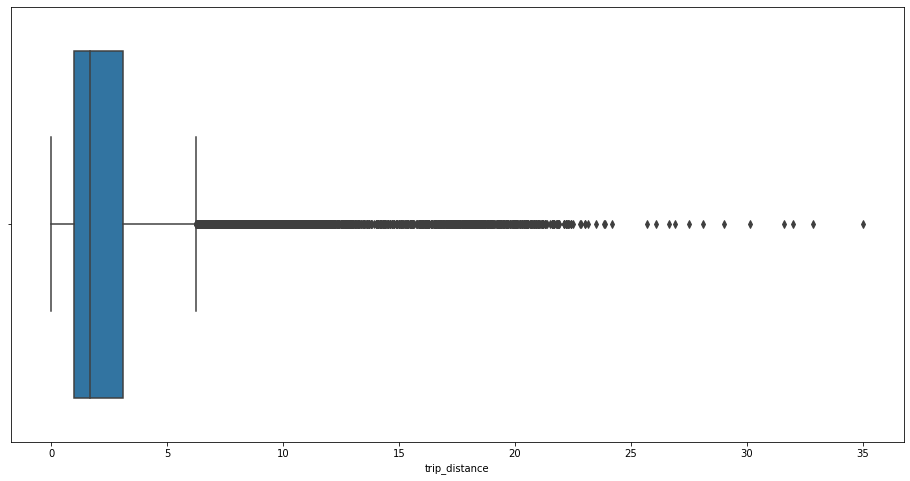

In [13]:
#boxplot for outlier in 'trip distance'
sns.boxplot(data=df, x="trip_distance")

In [14]:
#remove date below 0.10 quartile and greater than 0.90 quartile
Q1 = df['trip_distance'].quantile(0.10)
Q3 = df['trip_distance'].quantile(0.90)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['trip_distance'] >= Q1 - 1.5 * IQR) & (df['trip_distance'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1,1,0
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,0.5,4.50,0.00,0.3,33.30,1,1,0
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,0,1,0
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,0,1,0
5,1,2016-02-19 20:53:14,2016-02-19 21:02:31,1,1.80,1,0,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,2016-02-28 23:39:04,2016-02-28 23:49:07,1,3.32,1,0,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,1,1,0
27879,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,0.5,10.21,5.54,0.3,51.05,1,1,0
27880,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,0.5,2.66,0.00,0.3,15.96,1,1,0
27882,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,0.5,2.50,5.54,0.3,31.84,1,1,0


<AxesSubplot:xlabel='trip_distance'>

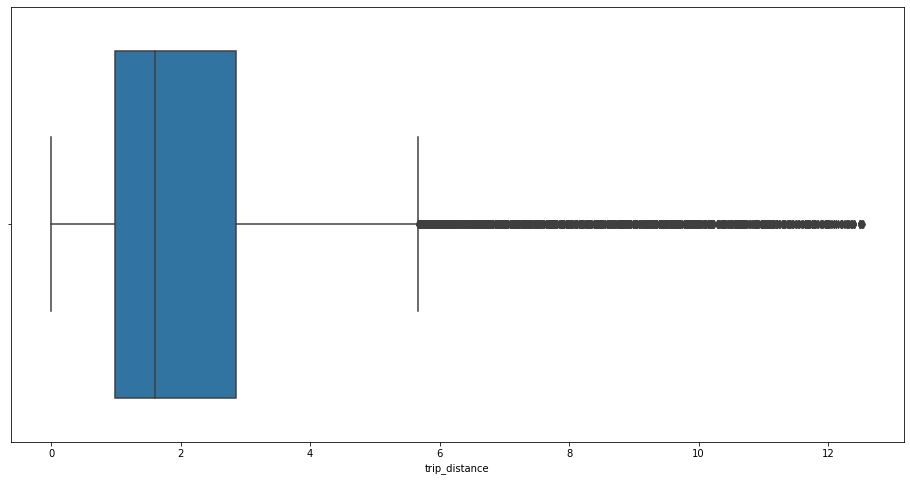

In [94]:
#boxplot in 'trip distance' after correcting outliers
sns.boxplot(data=df, x="trip_distance")

#### Remove duplicate rows and checking missing values

We will remove duplicate trips now but only the redundant trips will be eliminated; duplicate values won't be eliminated. As it is not necessary for these values to be distinct. To avoid affecting our original dataset, we shall perform this operation using a temporary variable 'td'.

Next we will check for missing values in our dataset, if any, we can either remove or replace it with some other value.

In [15]:
#drop duplicates
td = df.drop_duplicates()

In [16]:
#Now we check for number of duplicate rows dropped, we can see that there werent any duplicate rows in our data
print(f"{df.shape[0] - td.shape[0]} duplicate rows dropped. Thats {df.shape[0] / td.shape[0] * 100}%")
print(f"{td.shape[0]} rows remain.")

0 duplicate rows dropped. Thats 100.0%
27164 rows remain.


In [17]:
# Checking for missing values
for col in td.columns:
    missing = td[col].isna().sum()
    print(f"Missing values in {col}: {missing}")

Missing values in VendorID: 0
Missing values in tpep_pickup_datetime: 0
Missing values in tpep_dropoff_datetime: 0
Missing values in passenger_count: 0
Missing values in trip_distance: 0
Missing values in RatecodeID: 0
Missing values in store_and_fwd_flag: 0
Missing values in payment_type: 0
Missing values in fare_amount: 0
Missing values in extra: 0
Missing values in mta_tax: 0
Missing values in tip_amount: 0
Missing values in tolls_amount: 0
Missing values in improvement_surcharge: 0
Missing values in total_amount: 0
Missing values in GoodTip: 0
Missing values in Extra: 0
Missing values in Cash: 0


In [18]:
df = td

## 4. Feature Extraction

Now that we have selected the important features, we will move on to feature extraction,
Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set. It yields better results than applying machine learning directly to the raw data, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations.[2]

we will first start by splitting the existing columns 'tpep_pickup_datetime','tpep_dropoff_datetime', into meaningful columns as we will need these values for our model.
But to do this we first need to convert these columns to an actual Python/Pandas datetime object ensures that the data is a valid datetime. So that we can then explore these datetime objects.


#### 4.1 Splitting datetime to meaningful columns
As mentioned earlier we will now split the datetime columns to obtain features like month, day, day of week, and hour of day

In [19]:
#Converting to an actual Pandas datetime object 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [20]:
#get month, day of the month and week of the month and hour of day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour_of_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,...,0.00,0.3,13.55,1,1,0,2,19,4,20
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,...,0.00,0.3,33.30,1,1,0,2,19,4,20
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,...,0.00,0.3,8.75,0,1,0,2,19,4,20
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,...,0.00,0.3,9.35,0,1,0,2,19,4,20
5,1,2016-02-19 20:53:14,2016-02-19 21:02:31,1,1.80,1,0,1,8.0,0.5,...,0.00,0.3,11.15,1,1,0,2,19,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,2016-02-28 23:39:04,2016-02-28 23:49:07,1,3.32,1,0,1,12.0,0.5,...,0.00,0.3,15.96,1,1,0,2,28,6,23
27879,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,...,5.54,0.3,51.05,1,1,0,2,28,6,23
27880,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,...,0.00,0.3,15.96,1,1,0,2,28,6,23
27882,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,...,5.54,0.3,31.84,1,1,0,2,28,6,23


#### 4.2 Creating duration of a trip
We will now create another feature 'tot_mins_diff' which is the differnce between pickup and drop as we will be using this later in our model. We will simultaneously convert it to minutes. 

In [21]:
#time difference between pickup and drop #converting timedelta to minutes
df['tot_mins_diff'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
df 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day,tot_mins_diff
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,...,0.3,13.55,1,1,0,2,19,4,20,13.566667
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,...,0.3,33.30,1,1,0,2,19,4,20,27.100000
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,...,0.3,8.75,0,1,0,2,19,4,20,5.400000
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,...,0.3,9.35,0,1,0,2,19,4,20,8.100000
5,1,2016-02-19 20:53:14,2016-02-19 21:02:31,1,1.80,1,0,1,8.0,0.5,...,0.3,11.15,1,1,0,2,19,4,20,9.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,2016-02-28 23:39:04,2016-02-28 23:49:07,1,3.32,1,0,1,12.0,0.5,...,0.3,15.96,1,1,0,2,28,6,23,10.050000
27879,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,...,0.3,51.05,1,1,0,2,28,6,23,21.533333
27880,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,...,0.3,15.96,1,1,0,2,28,6,23,13.316667
27882,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,...,0.3,31.84,1,1,0,2,28,6,23,14.216667


In [22]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day,tot_mins_diff
1,1,2016-02-19 20:51:06,2016-02-19 21:04:40,1,2.10,1,0,1,10.0,0.5,...,0.3,13.55,1,1,0,2,19,4,20,13.566667
2,2,2016-02-19 20:52:22,2016-02-19 21:19:28,6,8.20,1,0,1,27.5,0.5,...,0.3,33.30,1,1,0,2,19,4,20,27.100000
3,1,2016-02-19 20:52:23,2016-02-19 20:57:47,1,0.80,1,0,1,6.0,0.5,...,0.3,8.75,0,1,0,2,19,4,20,5.400000
4,1,2016-02-19 20:52:33,2016-02-19 21:00:39,1,0.90,1,0,1,6.5,0.5,...,0.3,9.35,0,1,0,2,19,4,20,8.100000
5,1,2016-02-19 20:53:14,2016-02-19 21:02:31,1,1.80,1,0,1,8.0,0.5,...,0.3,11.15,1,1,0,2,19,4,20,9.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,2016-02-28 23:39:04,2016-02-28 23:49:07,1,3.32,1,0,1,12.0,0.5,...,0.3,15.96,1,1,0,2,28,6,23,10.050000
27879,2,2016-02-28 23:41:30,2016-02-29 00:03:02,1,11.91,1,0,1,34.0,0.5,...,0.3,51.05,1,1,0,2,28,6,23,21.533333
27880,2,2016-02-28 23:45:05,2016-02-28 23:58:24,1,2.78,1,0,1,12.0,0.5,...,0.3,15.96,1,1,0,2,28,6,23,13.316667
27882,2,2016-02-28 23:59:33,2016-02-29 00:13:46,5,7.96,1,0,1,22.5,0.5,...,0.3,31.84,1,1,0,2,28,6,23,14.216667


As you can see we now have a new column with the name 'tot_mins_diff', this gives the total duration of the trip, we have converted the timedelta to number of minutes. So it displays the number of minutes that each trip lasted.

Now, we can be drop the datetime columns entirely as we have extracted enough information from these.

In [23]:
#remove'tpep_pickup_datetime' and 'tpep_dropoff_datetime'
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day,tot_mins_diff
1,1,1,2.10,1,0,1,10.0,0.5,0.5,2.25,...,0.3,13.55,1,1,0,2,19,4,20,13.566667
2,2,6,8.20,1,0,1,27.5,0.5,0.5,4.50,...,0.3,33.30,1,1,0,2,19,4,20,27.100000
3,1,1,0.80,1,0,1,6.0,0.5,0.5,1.45,...,0.3,8.75,0,1,0,2,19,4,20,5.400000
4,1,1,0.90,1,0,1,6.5,0.5,0.5,1.55,...,0.3,9.35,0,1,0,2,19,4,20,8.100000
5,1,1,1.80,1,0,1,8.0,0.5,0.5,1.85,...,0.3,11.15,1,1,0,2,19,4,20,9.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,1,3.32,1,0,1,12.0,0.5,0.5,2.66,...,0.3,15.96,1,1,0,2,28,6,23,10.050000
27879,2,1,11.91,1,0,1,34.0,0.5,0.5,10.21,...,0.3,51.05,1,1,0,2,28,6,23,21.533333
27880,2,1,2.78,1,0,1,12.0,0.5,0.5,2.66,...,0.3,15.96,1,1,0,2,28,6,23,13.316667
27882,2,5,7.96,1,0,1,22.5,0.5,0.5,2.50,...,0.3,31.84,1,1,0,2,28,6,23,14.216667


Before we proceed with analysis we have to check for outliers in newly created feature -- 'tot_mins_diff', that is the total trip duration. To do so I have used a box plot. On analysing the plot we find a number of outliers, that have no meaning to our data and will affect accuracy of our model.

For example - Trip durations for minutes 800, 1400 minutes in newyork make no sense, hence we will go ahead and drop these outliers to get a clean and smooth data. 

<AxesSubplot:xlabel='tot_mins_diff'>

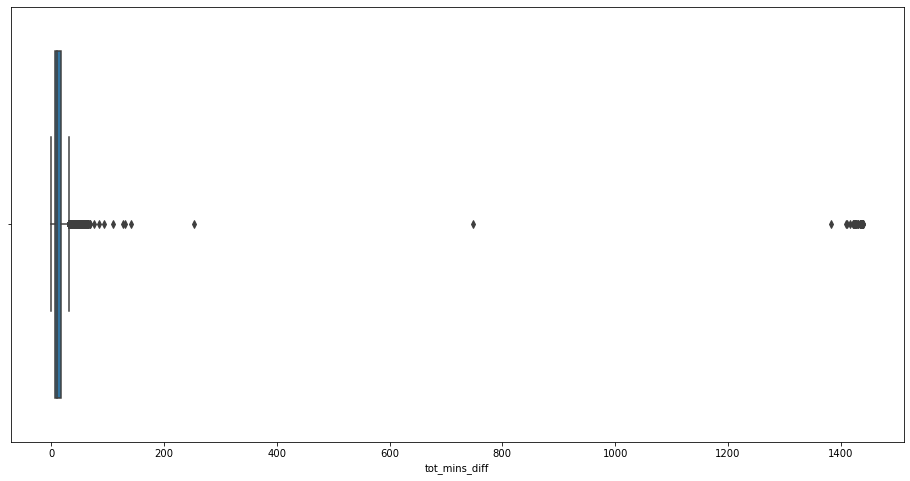

In [24]:
sns.boxplot(data=df, x="tot_mins_diff") #Finding outliers in 'tot_mins_diff' col

In [25]:
Q1 = df['tot_mins_diff'].quantile(0.10)
Q3 = df['tot_mins_diff'].quantile(0.90)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['tot_mins_diff'] >= Q1 - 1.5 * IQR) & (df['tot_mins_diff'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day,tot_mins_diff
1,1,1,2.10,1,0,1,10.0,0.5,0.5,2.25,...,0.3,13.55,1,1,0,2,19,4,20,13.566667
2,2,6,8.20,1,0,1,27.5,0.5,0.5,4.50,...,0.3,33.30,1,1,0,2,19,4,20,27.100000
3,1,1,0.80,1,0,1,6.0,0.5,0.5,1.45,...,0.3,8.75,0,1,0,2,19,4,20,5.400000
4,1,1,0.90,1,0,1,6.5,0.5,0.5,1.55,...,0.3,9.35,0,1,0,2,19,4,20,8.100000
5,1,1,1.80,1,0,1,8.0,0.5,0.5,1.85,...,0.3,11.15,1,1,0,2,19,4,20,9.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27878,2,1,3.32,1,0,1,12.0,0.5,0.5,2.66,...,0.3,15.96,1,1,0,2,28,6,23,10.050000
27879,2,1,11.91,1,0,1,34.0,0.5,0.5,10.21,...,0.3,51.05,1,1,0,2,28,6,23,21.533333
27880,2,1,2.78,1,0,1,12.0,0.5,0.5,2.66,...,0.3,15.96,1,1,0,2,28,6,23,13.316667
27882,2,5,7.96,1,0,1,22.5,0.5,0.5,2.50,...,0.3,31.84,1,1,0,2,28,6,23,14.216667


<AxesSubplot:xlabel='tot_mins_diff'>

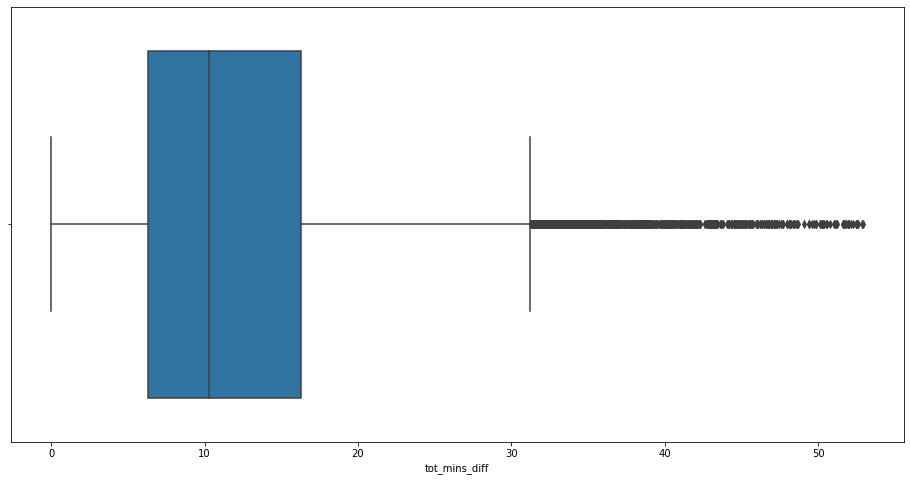

In [26]:
sns.boxplot(data=df, x="tot_mins_diff") #Now we again plot and see that the data is now clean for tot_mins_diff

## 5. Visualizations

Now we will create a few visualizations of our data so that we can quickly form interpretations and 

In [27]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,GoodTip,Extra,Cash,month,day,day_of_week,hour_of_day,tot_mins_diff
count,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,...,27066.000000,27066.000000,27066.000000,27066.000000,27066.000000,27066.0,27066.000000,27066.000000,27066.000000,27066.000000
mean,1.535875,1.657319,2.434297,1.007611,0.004914,1.330525,11.193424,0.321270,0.498781,1.603545,...,0.299734,14.083657,0.376118,0.486182,0.321436,2.0,15.159795,3.028227,13.644425,12.310255
std,0.498721,1.310062,2.368084,0.158091,0.069928,0.482508,7.540559,0.376751,0.028158,1.912174,...,0.012093,9.284317,0.484419,0.499818,0.467037,0.0,8.235087,2.000595,6.368579,8.208160
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-52.000000,-4.500000,-0.500000,0.000000,...,-0.300000,-58.340000,0.000000,0.000000,0.000000,2.0,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.500000,0.000000,0.500000,0.000000,...,0.300000,8.300000,0.000000,0.000000,0.000000,2.0,8.000000,1.000000,9.000000,6.283333
50%,2.000000,1.000000,1.600000,1.000000,0.000000,1.000000,9.000000,0.000000,0.500000,1.320000,...,0.300000,11.300000,0.000000,0.000000,0.000000,2.0,15.000000,3.000000,14.000000,10.300000
75%,2.000000,2.000000,2.900000,1.000000,0.000000,2.000000,13.500000,0.500000,0.500000,2.260000,...,0.300000,16.560000,1.000000,1.000000,1.000000,2.0,22.000000,5.000000,19.000000,16.266667
max,2.000000,6.000000,14.850000,5.000000,1.000000,4.000000,275.000000,4.500000,0.500000,68.800000,...,0.300000,344.100000,1.000000,1.000000,1.000000,2.0,29.000000,6.000000,23.000000,52.916667


##### Insights:
Average trip duratuion was 12.3 minutes. and the max duration was 52.9 minutes for the month of feb.

#### 5.1 Boxplots for analysis

We will visualise here how the Extra variable varies with other variable. Giving us an idea if the extra charges were levied and how was it affected due to other variables like trip duration, day of week, hour of the day, Night charges etc.

<AxesSubplot:xlabel='payment_type', ylabel='tot_mins_diff'>

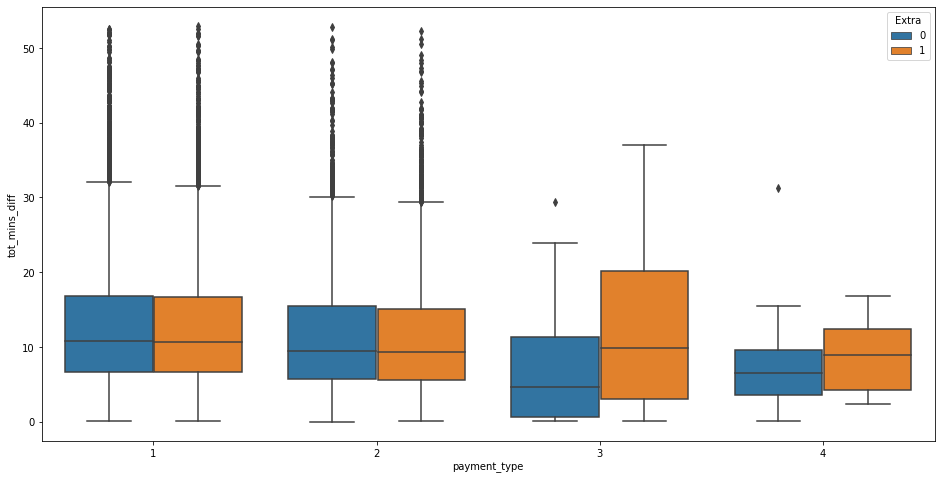

In [28]:
sns.boxplot(data=df, y = 'tot_mins_diff', x="payment_type", hue = 'Extra' )

##### Insights:
Boxplot above shows how 'Extra' variable was based on the type of payment and the total trip duration , it can be seen it is almost equal for payment type 1 and 2 but has a huge difference for payment type 3 indicating that when payment type 3 was used the extra charges were more often 'True' (applied) on the fare amount. 

<AxesSubplot:xlabel='day_of_week', ylabel='tot_mins_diff'>

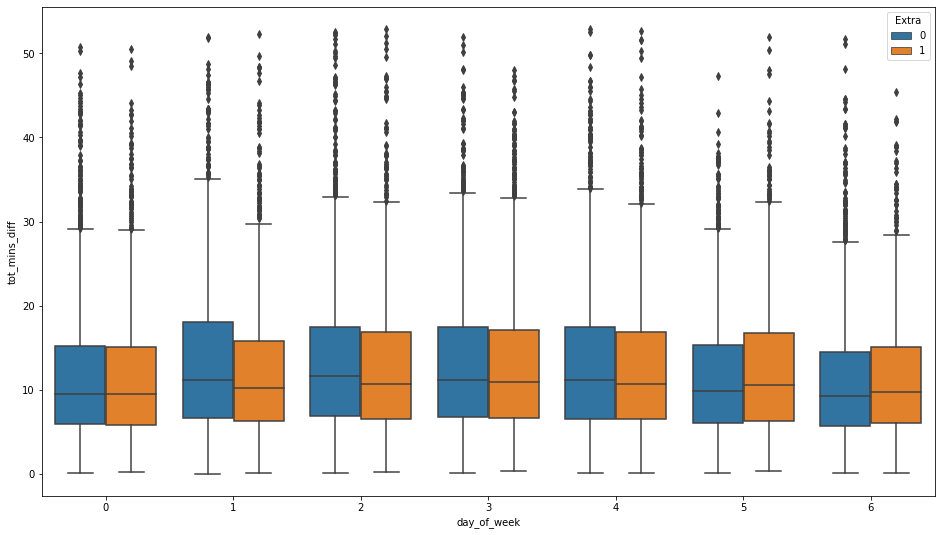

In [123]:
sns.boxplot(data=df, y = 'tot_mins_diff', x="day_of_week", hue = 'Extra')

##### Insights:
As we can see in the plot above,depending on the trip duraton and day of week we can see how the Extra variable varies. When extra charge was applied - Orange bix and when it was false -blue box.
it can be seen for the month of feb extra charges were more on the weekends (day of week = 5,6)

<AxesSubplot:xlabel='hour_of_day', ylabel='tot_mins_diff'>

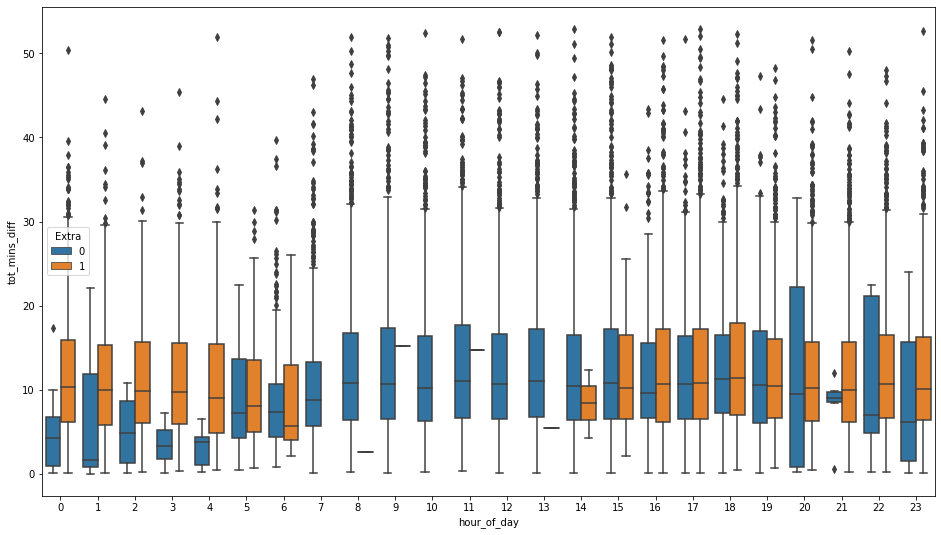

In [125]:
sns.boxplot(data=df, y = 'tot_mins_diff', x="hour_of_day", hue = 'Extra')

##### Insights:
1.It can also be seen that the overnight (8pm to 6am) were applied during the later hours of the day hence the increase in extra charges. As verified in dataset information too.

2.Charge for rushhour, between 4pm and 8pm on weekdays can also be seen.

Also the extra charges were not present during the working hours of the day. For the month feb.

<AxesSubplot:xlabel='passenger_count', ylabel='tot_mins_diff'>

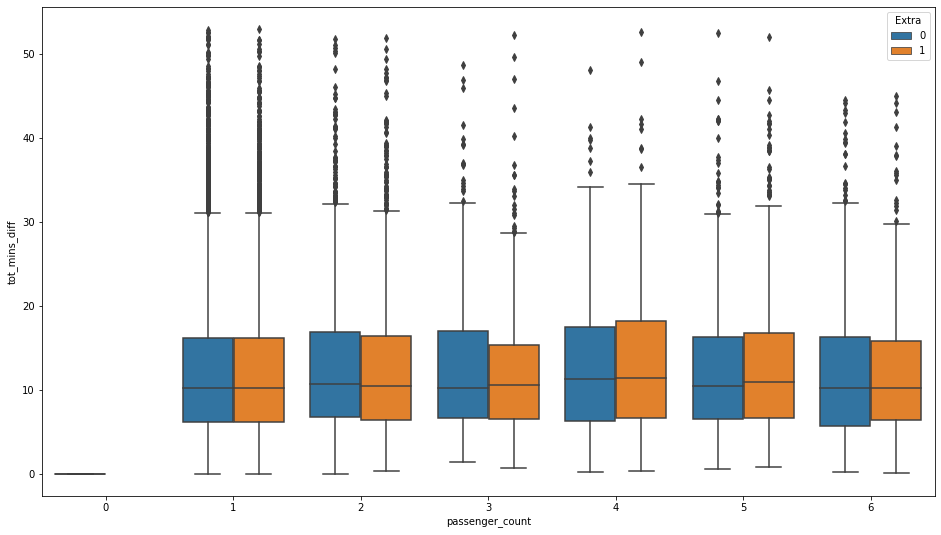

In [138]:
sns.boxplot(data=df, y = 'tot_mins_diff', x="passenger_count", hue = 'Extra')

#### 5.2 Correlation  Matrix heatmap

visualizing the correlation between different values is a correlation matrix or heatmap. The correlation matrix calculates how the change in one value effects a change in the other value, and assigns a value between -1 and 1 to that correlation.

-1 A very strong negative correlation.

0 No correlation between values A and B.

1 A very strong positive correlation.

We will plot it in a heatmap

In [106]:
tx = df.drop('month', axis=1)
tx.head()  #temporarily dropping month to obtain better corr matrix as data is only for one month - Feb

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,day,day_of_week,hour_of_day,tot_mins_diff
1,1,2.1,1,0,1,10.0,0.5,0.5,2.25,0.0,0.3,13.55,1,1,0,19,4,20,13.566667
2,6,8.2,1,0,1,27.5,0.5,0.5,4.50,0.0,0.3,33.30,1,1,0,19,4,20,27.100000
3,1,0.8,1,0,1,6.0,0.5,0.5,1.45,0.0,0.3,8.75,0,1,0,19,4,20,5.400000
4,1,0.9,1,0,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35,0,1,0,19,4,20,8.100000
5,1,1.8,1,0,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,1,1,0,19,4,20,9.283333


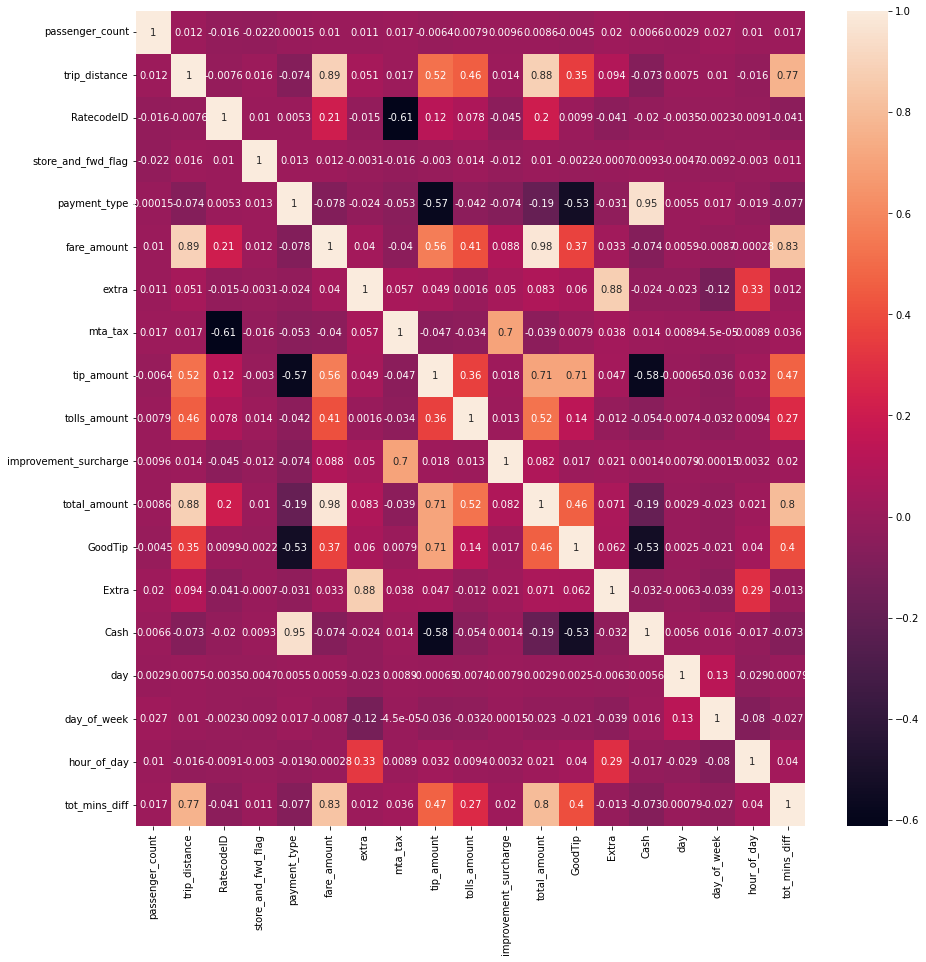

In [112]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(tx.corr(), annot=True)
plt.show() 

##### Insights:
It can be seen that Extra attribute is highly correlated to 'extra' which is attribute indicating how much extra charges were leivied on the trip and the attribute 'hour of the day'. 

<AxesSubplot:xlabel='Extra', ylabel='count'>

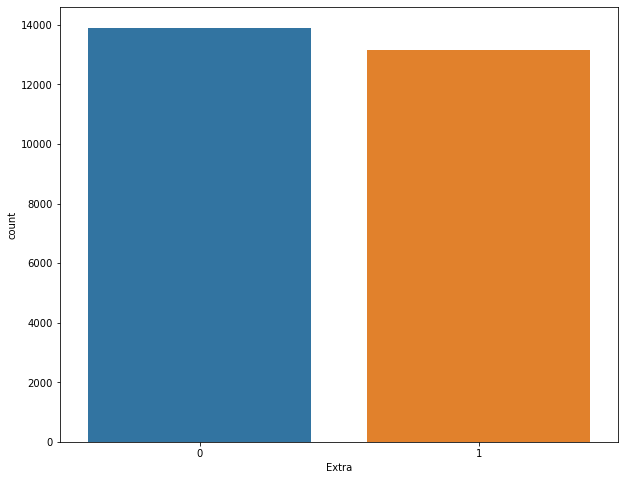

In [113]:
sns.countplot(df.Extra)

##### Insights:
As we can see the True false rows are nearly equal so we dont have to do any more preprocessing to make the classes equal.
This is good as our model wont become bias now.

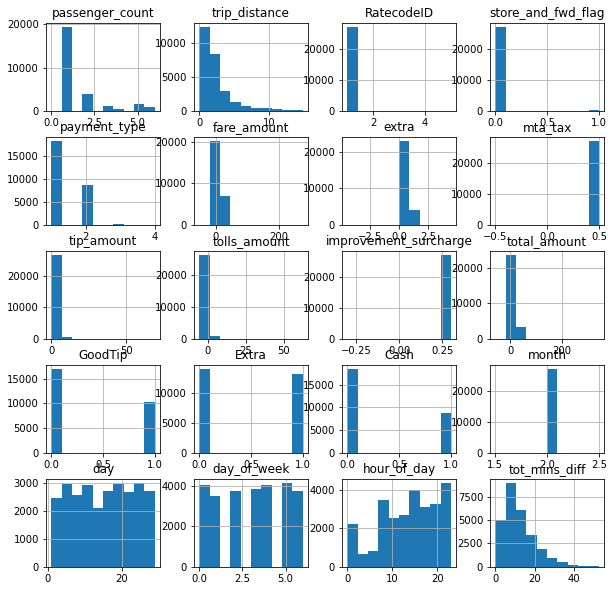

In [118]:
df.hist()
plt.show()

## 6. Analysis

#### 6.1 PCA
A tool used for data visualization or data pre-processing before supervised techniques are applied. To reduce a large number of variables to a smaller number of factors for modeling purposes

We will use Principal component analysis (PCA) a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss[3]. PCA finds a sequence of linear combinations of the variables that have maximal variance, and are mutually uncorrelated. We will be using it for[4]

- To reduce a large number of variables to a smaller number of factors for modeling purposes
- To validate a scale or index by demonstrating that its constituent items load on the same factor, and to drop proposed scale items which cross-load on more than one factor


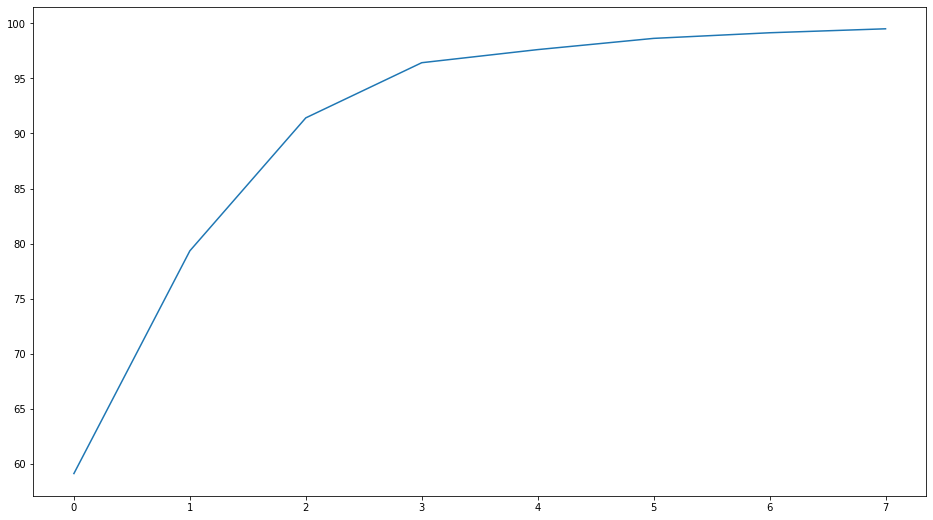

In [27]:
#PCA Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(df)
#The amount of variance that each Principal Component explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

#choose the cornered portion, 5 components explain 98% of data

#### 6.2 Train Test -Split
In order to validate any predictive model, When finished developing a model, we are going to hold back some data that the algorithms will not get to see, When finished developing a model, we will be able to apply it on this test data. This allows us to measure how well our model would work in real life, before actually deploying the model.

We will split the loaded dataset into two, 70% of which we will use to train, evaluate and select among our models, and 30% that we will hold back as a validation dataset.

In [28]:
from sklearn.model_selection import train_test_split

_x = df.drop('Extra', axis = 1)
X = _x
Y = df['Extra']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

We now have training data in the X_train and y_train for preparing models and a X_test and y_test sets that we can use later.

#### 6.3 Scaling
Since the variables in our dataset are in different units, we will be scaling them using StandardScaler().Otherwise, they might behave badly if the individual features do not more or less look like standard normally distributed data

In [30]:
# Standardize data different scales for col hence this
from sklearn import preprocessing
scaled_x_train = preprocessing.StandardScaler().fit_transform(X_train)
scaled_x_test = preprocessing.StandardScaler().fit_transform(X_test)

## 7. Models

In this step we will be building 8 different models -
- Decision Tree
- Logistic Regression
- Random Forest
- Extra Tree
- Ada Boost
- Gradient Boost
- KNN classifier
- Neural Network

We don’t know which algorithms would be good on this problem or what configurations to use.

#### 7.1 Decision Tree
Decision tree classifiers are supervised machine learning models.

Here, our variable 'Extra' is Categorical hence we can use classification tree. 

The Gini Impurity measures the likelihood that an item will be misclassified if it’s randomly assigned a class based on the data’s distribution. We previously saw our distribution was nearly equal. [5]

In [95]:
from sklearn.tree import DecisionTreeClassifier

pca = PCA(n_components=5)
pca_scaled_x_train = pca.fit_transform(scaled_x_train) #Converting our previously scaled variable to PCA.
pca_scaled_x_test = pca.fit_transform(scaled_x_test)

#learn


In [32]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(pca_scaled_x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [36]:
#y_predict will store the values predicted by our model.
y_predict = clf_model.predict(pca_scaled_x_test)

In [37]:
#Error metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

from sklearn.model_selection import cross_val_score

In [322]:
print(classification_report(y_test,y_predict)) #imp error metrics in classification models. 

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      4124
           1       0.87      0.71      0.78      3996

    accuracy                           0.81      8120
   macro avg       0.82      0.81      0.81      8120
weighted avg       0.82      0.81      0.81      8120



In [323]:
#Visualising using confusion matrix
#A confusion matrix is a technique for summarizing the performance of a classification algorithm.

confusion_matrix(y_test,y_predict)

array([[3708,  416],
       [1148, 2848]], dtype=int64)

In [158]:
# we cross_validate also allows to specify metrics which you want to see
print(cross_val_score(clf_model, pca_scaled_x_train,y_train, cv=3))

#cross validation makes it better

[0.86827106 0.86793349 0.86524149]


AUC: 0.806


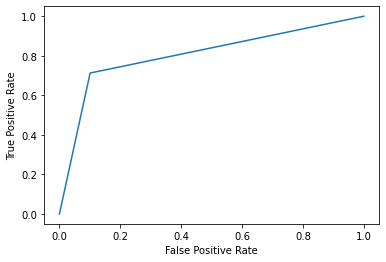

In [324]:
#A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers.
#plotting the true positive rate (TPR) against the false positive rate (FPR). 
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes.
from sklearn.metrics import roc_auc_score, roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('AUC: %.3f' % auc)

##### Insights:
1. We created our Decision Tree Classifier model and assigned it to the variable clf.
2. We then applied the .fit_transform() method to simultaneously fit and transform the column transformations on the pca_scaled_x_train dataset. In order to do this, we passed in our training data.
3. We make predictions based on our pca_scaled_x_test, and assigned a new variable, y-predict, which takes the values from applying the .predict() method to our model clf.
4. We can see that the accuracy score that’s returned is 0.86, or 86%. This means that for all of the values we attempted to predict, 86% of them were correct.
5. We then make a classification report with F1, recall, precision and Accuracy score. 
6. Our confusion matrix displays our model has correctly predicted the events and no events i.e correctly predicted True or False for Extra charge for a high number of time. 
7. Furthermore, the class completes a process of cross-validation. This means that the class will cycle through different combinations of training and testing data, in order to help prevent overfitting. In our model, when we set a test size of 30%, cross-validation will cycle through different splits of that 30% in relation to the whole.
8. ROC curve shows -

#### 7.2 Logistic Regression


In [149]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [151]:
model.fit(pca_scaled_x_train,y_train)

LogisticRegression()

In [179]:
y_predict = model.predict(pca_scaled_x_test)
model.predict_proba(pca_scaled_x_test)
model.score(pca_scaled_x_test,y_test)

0.7612068965517241

In [293]:
accuracy_score(y_test,y_predict)

0.6847290640394089

In [295]:
print(classification_report(y_test,y_predict)) 

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      4124
           1       0.64      0.84      0.72      3996

    accuracy                           0.68      8120
   macro avg       0.71      0.69      0.68      8120
weighted avg       0.71      0.68      0.68      8120



In [296]:
confusion_matrix(y_test,y_predict)

array([[2186, 1938],
       [ 622, 3374]], dtype=int64)

In [297]:
print(cross_val_score(clf_model, pca_scaled_x_train,y_train, cv=3))

[0.86827106 0.86793349 0.86524149]


AUC: 0.687


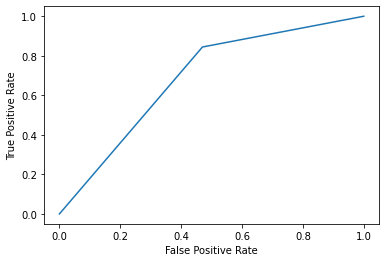

In [298]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('AUC: %.3f' % auc)

#### 7.3 Random Forest
Random Forest are an ensemble machine learning algorithm.

Decision trees can also be prone to overfitting, resulting in performance on new data. One easy way in which to reduce overfitting is to use Random Forest i.e multiple decision trees, Each of these trees gets a vote and the classification with the most votes is the one that’s returned. [6]

In [255]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(pca_scaled_x_train,y_train)

RandomForestClassifier()

In [256]:
y_predict = clf.predict(pca_scaled_x_test)

In [257]:
accuracy_score(y_test,y_predict)

0.7083743842364532

In [258]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      4124
           1       0.69      0.75      0.72      3996

    accuracy                           0.71      8120
   macro avg       0.71      0.71      0.71      8120
weighted avg       0.71      0.71      0.71      8120



In [259]:
#visualize
confusion_matrix(y_test,y_predict)

array([[2768, 1356],
       [1012, 2984]], dtype=int64)

In [260]:
# cross_validate
print(cross_val_score(clf_model, pca_scaled_x_train,y_train, cv=3))

[0.86827106 0.86793349 0.86524149]


Models scores - 70% 

AUC: 0.709


Text(0, 0.5, 'True Positive Rate')

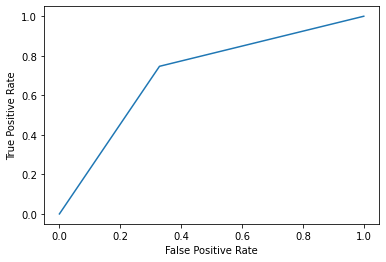

In [261]:
#ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### 7.4 Extra Trees
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.[7]


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(pca_scaled_x_train,y_train)
y_predict = clf.predict(pca_scaled_x_test)

In [263]:
accuracy_score(y_test,y_predict)

0.7108374384236453

In [264]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4124
           1       0.71      0.70      0.70      3996

    accuracy                           0.71      8120
   macro avg       0.71      0.71      0.71      8120
weighted avg       0.71      0.71      0.71      8120



In [265]:
confusion_matrix(y_test,y_predict)

array([[2990, 1134],
       [1214, 2782]], dtype=int64)

In [266]:
# cross_validate also allows to specify metrics which you want to see
print(cross_val_score(clf, pca_scaled_x_train,y_train, cv=3))

#cross validation makes it better

[0.94031032 0.93602534 0.93444181]


AUC: 0.711


Text(0, 0.5, 'True Positive Rate')

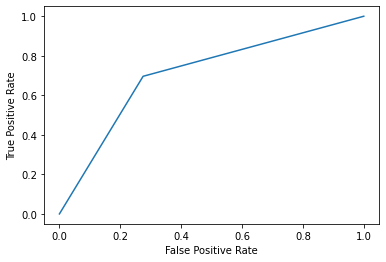

In [267]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### 7.5 K- Nearest Neighbors
In classification problems, the KNN algorithm will attempt to infer a new data point’s class by looking at the classes of the majority of its k neighbours. we take number of neighbours =20 
[8]

In [268]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(pca_scaled_x_train,y_train)
y_predict = neigh.predict(pca_scaled_x_test)

In [269]:
accuracy_score(y_test,y_predict) 

0.7323891625615764

In [270]:
#Error Metrics
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      4124
           1       0.80      0.61      0.69      3996

    accuracy                           0.73      8120
   macro avg       0.75      0.73      0.73      8120
weighted avg       0.75      0.73      0.73      8120



In [271]:
#visualizing
confusion_matrix(y_test,y_predict)

array([[3526,  598],
       [1575, 2421]], dtype=int64)

In [326]:
# cross_validate 
print(cross_val_score(neigh, pca_scaled_x_train,y_train, cv=3))


[0.89075364 0.89168646 0.88487728]


We get a model accuracy of 73% which is not bad.

AUC: 0.730


Text(0, 0.5, 'True Positive Rate')

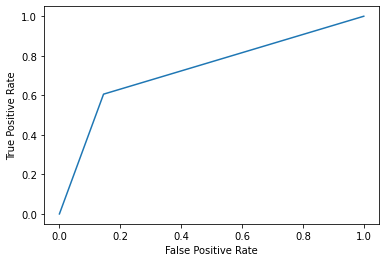

In [273]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### 7.6 ADA Boost
Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers.
This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
AdaBoost is a boosting algorithm developed for binary classification. 

In [274]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(pca_scaled_x_train,y_train)
y_predict = clf.predict(pca_scaled_x_test)

In [275]:
accuracy_score(y_test,y_predict)

0.7582512315270936

In [276]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      4124
           1       0.72      0.84      0.77      3996

    accuracy                           0.76      8120
   macro avg       0.77      0.76      0.76      8120
weighted avg       0.77      0.76      0.76      8120



In [277]:
confusion_matrix(y_test,y_predict)

array([[2812, 1312],
       [ 651, 3345]], dtype=int64)

In [278]:
print(cross_val_score(clf, pca_scaled_x_train,y_train, cv=3))

#cross validation makes it better

[0.9091197  0.90973872 0.9141726 ]


AUC: 0.759


Text(0, 0.5, 'True Positive Rate')

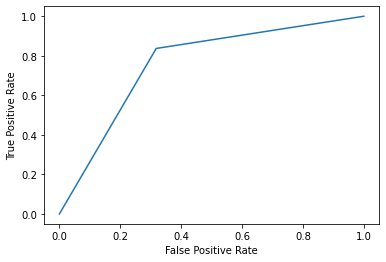

In [279]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### 7.7 Gradient Boosting Algorithm
Gradient boosting classifiers are the AdaBoosting method combined with weighted minimization, after which the classifiers and weighted inputs are recalculated. The objective of Gradient Boosting classifiers is to minimize the loss, or the difference between the actual class value of the training example and the predicted class value. [9][10]

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
clf.get_params()#
clf.fit(pca_scaled_x_train,y_train)
y_predict = clf.predict(pca_scaled_x_test)

In [282]:
accuracy_score(y_test,y_predict)

0.6955665024630542

In [241]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      4124
           1       0.67      0.74      0.71      3996

    accuracy                           0.70      8120
   macro avg       0.70      0.70      0.70      8120
weighted avg       0.70      0.70      0.70      8120



In [283]:
confusion_matrix(y_test,y_predict)

array([[2692, 1432],
       [1040, 2956]], dtype=int64)

In [284]:
print(cross_val_score(clf, pca_scaled_x_train,y_train, cv=3))

#cross validation makes it better

[0.93999367 0.93491686 0.92921615]


AUC: 0.696


Text(0, 0.5, 'True Positive Rate')

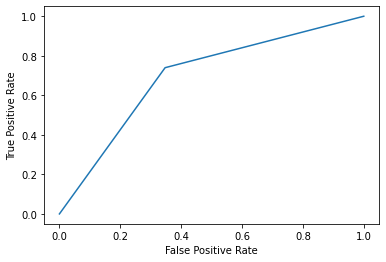

In [285]:
#ROC Curve
 
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### 7.8 Neural Network

In [286]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(pca_scaled_x_train,y_train)
y_predict = clf.predict(pca_scaled_x_test)

In [287]:
accuracy_score(y_test,y_predict)

0.6847290640394089

In [288]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      4124
           1       0.64      0.84      0.72      3996

    accuracy                           0.68      8120
   macro avg       0.71      0.69      0.68      8120
weighted avg       0.71      0.68      0.68      8120



In [289]:
confusion_matrix(y_test,y_predict)

array([[2186, 1938],
       [ 622, 3374]], dtype=int64)

In [290]:
print(cross_val_score(clf, pca_scaled_x_train,y_train, cv=3))

#cross validation makes it better

[0.88901203 0.96595408 0.96310372]


AUC: 0.687


Text(0, 0.5, 'True Positive Rate')

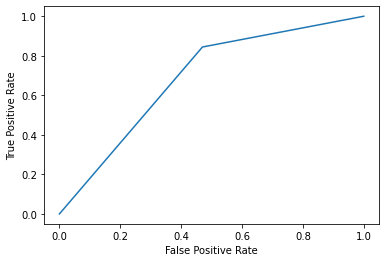

In [292]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Result

After carefully analysing the above models we arrive at the following conclusions:

1. The Best accuracy score was of 80% that we got for Decision tree classifier. The accuracy is important as target variable 'Extra' although binary is still well balanced, hence we can use accuracy as a metric of scoring the model.

2. Precision score for 'false' values was 76% and for 'True' values it was 87% this shows that the correctly predicted cases of our decision tree classifier model actually turned out to be positive. 87% 'Extra charge = True' was correctly predicted and 76% 'Extra charge =False' was correctly predicted.

3. We got an excellent f1 score - 0.83 for 'Extra charge =False' and 0.71 for 'Extra charge = True'. The more closer the F1 score to 1 the better the performance of the model is.

4. Next we plotted the confusion matrix - Confusion Matrix is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values. We can evaluate our model and gain more insights as the target varibale 'Extra' is binary classification variable. We can the see the value lying across the main diagonal is again highest in Decision tree classifier ie. True Positive = 3708  and True negative = 2848 while the false negative = 1148 and false positives is = 416, which shows our model performed well. 

5. Furthermore, we perform 3 fold cross validation. This means that the class will cycle through different combinations of training and testing data, in order to help prevent overfitting. In our model, when we set a test size of 30%, cross-validation will cycle through different splits of that 30% in relation to the whole. The Accuracy of the model is the average of the accuracy of each fold.
    The highest accuracy of model after cross validation = 94%, For Extra Tree Classifier.
      
6. Lastly, we have plotted an ROC curve to measure the Area under the curve or AUC for evaluation as It is used for binary classification problem and  there are roughly equal numbers of observations for each class. The AUC is the measure of the ability of a classifier to distinguish between classes[11]. In our case, it needs to differentiate between when the Extra charge = True i.e Extra charge  was applied on the fare amount, and when it wasnt i.e Extra charge ='False'. The greater the value, the better is the performance of our model. 
    The Best AUC was again for Decision Tree Classifoer - AUC: 0.806 (shown below)
    Hence our model was able to differentiate between the binary classes quite successfully.


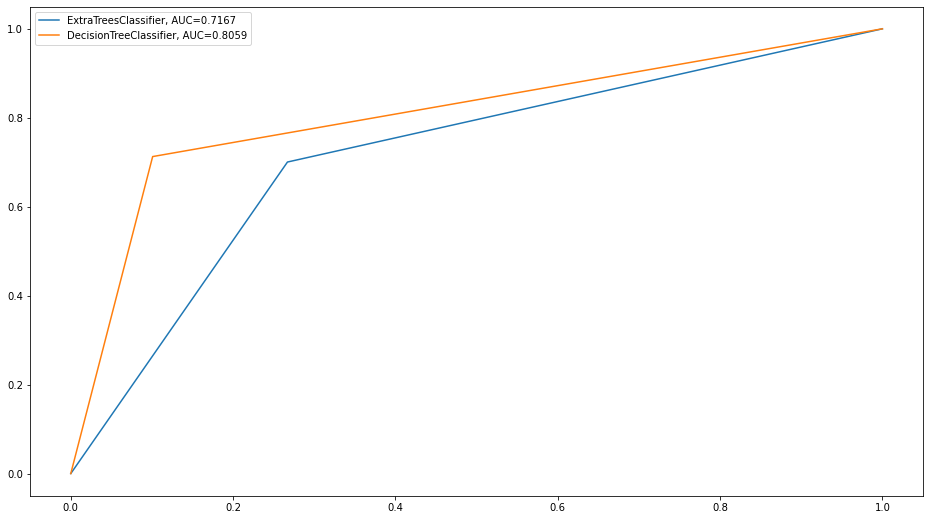

In [40]:
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(pca_scaled_x_train,y_train)
y_predict = clf.predict(pca_scaled_x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="ExtraTreesClassifier, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(pca_scaled_x_train,y_train)
y_predict = clf_model.predict(pca_scaled_x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, AUC="+str(auc))

#add legend
plt.legend()

From the above Graph we can again see that the Decision Tree Classifier is a better choice of model as The AUC is higher for Decision tree.

Hence, we can conclude that the best predictive model suited for our 
#### target variable 'Extra' is -- Decision Tree CLassifier.
As it has the highest accuracy score and error metrics.  
Plotting the predicted and actual varibales we get following graph which shows how correctly our model predicted the values. 
We also generate a scatter plot for the same. 

In [329]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
df

,Actual,Predicted
15439,1,1
7072,1,0
23563,0,0
10629,0,1
27433,1,0
...,...,...
26355,0,0
11026,0,0
20891,1,1
19510,1,0


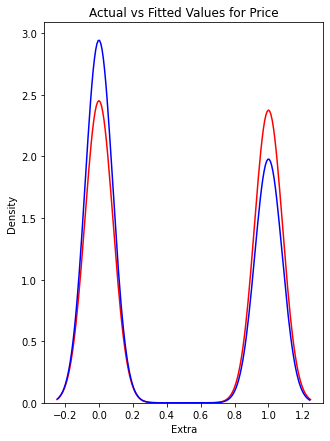

In [336]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

The above is the graph between the actual(Represented by red line) and predicted values(represented by blue line). It shows that our model somewhat made correct predictions, Since our variable was binary and indicated whether extra charges were applied or not there are Peaks at 0(False) and 1(True), these values were predicted correctly 80% of the time, looking at the difference in actual and predicted model we can infer that this is not a very good model for the target variable and dataset in hand. The red peaks show that our field was balanced but the predicted model shows an imbalance. 
To further improve the model we can -
1. GridSearch the algorithms to have more specific parameters, since currently vanilla algorithms are used. 

2. Features can be analysied to find individual important for each model.

## References

1.	https://www.nyc.gov/site/tlc/businesses/yellow-cab.page
2.	https://www.mathworks.com/discovery/feature-extraction.html
3.	https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202
4.	https://www.keboola.com/blog/pca-machine-learning
5.	https://datagy.io/sklearn-decision-tree-classifier/
6.	https://datagy.io/sklearn-random-forests/
7.	https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/
8.	https://datagy.io/python-knn/
9.	https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
10.	https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d
11.	https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/

Other References
1. https://www.xoriant.com/blog/decision-trees-for-classification-a-machine-learning-algorithm
2. https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
3. https://link.springer.com/referenceworkentry/10.1007/978-0-387-39940-9_565
4. https://towardsdatascience.com/beginner-guide-to-build-compare-and-evaluate-machine-learning-models-in-under-10-minutes-19a6781830de
5. https://machinelearningmastery.com/

